In [1]:
import numpy as np
import pandas as pd


# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [ ]:
df = pd.read_csv("../data/adult.csv")
df = df[(df != '?').all(axis=1)]
mask = (df['salary'] == '>50K') & (df['salary K$'] < 50) | (df['salary'] == '<=50K') & (df['salary K$'] >= 50)


# Task 1
Print the count of men and women in the dataset.

In [35]:
male_count = df[df['sex'] == 'Male']['sex'].count()
female_count = df[df['sex'] == 'Female']['sex'].count()

# Print the counts
print("Number of men:", male_count)
print("Number of women:", female_count)

Number of men: 20380
Number of women: 9782


# Task 2
Find the average age of men in dataset

In [36]:
men = df[df['sex'] == 'Male']
avg_age_men = men['age'].mean()
print("Average age of men:", avg_age_men)

Average age of men: 39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [37]:
poland = df[df['native-country'] == 'Poland']
percent_poland = (len(poland) / len(df)) * 100
print("Percentage of people from Poland:", percent_poland)

Percentage of people from Poland: 0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [38]:
high_salary = df[df['salary'] == '>50K']
high_salary_age_mean = high_salary['age'].mean()
high_salary_age_std = high_salary['age'].std()


print("Mean age of people who earn > 50K per year:", high_salary_age_mean)
print("Standard deviation of age of people who earn > 50K per year:", high_salary_age_std)


low_salary = df[df['salary'] == '<=50K']
low_salary_age_mean = low_salary['age'].mean()
low_salary_age_std = low_salary['age'].std()


print("Mean age of people who earn <= 50K per year:", low_salary_age_mean)
print("Standard deviation of age of people who earn <= 50K per year:", low_salary_age_std)

Mean age of people who earn > 50K per year: 43.95911028236548
Standard deviation of age of people who earn > 50K per year: 10.269632835673852
Mean age of people who earn <= 50K per year: 36.60806038668668
Standard deviation of age of people who earn <= 50K per year: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [39]:
high_salary = df[df['salary'] == '>50K']
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
no_higher_edu = high_salary[~high_salary['education'].isin(higher_education)]
print("People without higher education but with >50K salary:")
print(no_higher_edu)

People without higher education but with >50K salary:
       Unnamed: 0  age         workclass     education      marital-status  \
7               7   52  Self-emp-not-inc       HS-grad  Married-civ-spouse   
10             10   37           Private  Some-college  Married-civ-spouse   
55             55   43           Private  Some-college  Married-civ-spouse   
67             67   53           Private       HS-grad  Married-civ-spouse   
68             68   49      Self-emp-inc  Some-college  Married-civ-spouse   
...           ...  ...               ...           ...                 ...   
32462       32462   48      Self-emp-inc       HS-grad  Married-civ-spouse   
32518       32518   57         Local-gov       HS-grad  Married-civ-spouse   
32519       32519   46           Private  Some-college  Married-civ-spouse   
32557       32557   40           Private       HS-grad  Married-civ-spouse   
32560       32560   52      Self-emp-inc       HS-grad  Married-civ-spouse   

         

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [40]:
edu_age_stats = df.groupby('education')['age'].describe()
print("Statistics of age for each type of education:")
print(edu_age_stats)

Statistics of age for each type of education:
               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-gr

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [43]:
men = df[df['sex'] == 'Male']
married_men = men[men['marital-status'].str.startswith('Married')]
non_married_men = men[~men['marital-status'].str.startswith('Married')]
married_high_earners = married_men[married_men['salary'] == '>50K']['salary'].count()
married_low_earners = married_men[married_men['salary'] == '<=50K']['salary'].count()
non_married_high_earners = non_married_men[non_married_men['salary'] == '>50K']['salary'].count()
non_married_low_earners = non_married_men[non_married_men['salary'] == '<=50K']['salary'].count()
print("Married Men:")
print(f">50K: {married_high_earners}, <=50K: {married_low_earners}")
print("Non-Married Men:")
print(f">50K: {non_married_high_earners}, <=50K: {non_married_low_earners}")

Married Men:
>50K: 5723, <=50K: 7052
Non-Married Men:
>50K: 673, <=50K: 6932


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [44]:
max_hours = df['hours-per-week'].max()
print(f"The maximum number of hours worked per week is {max_hours}")
num_people_max_hours = df[df['hours-per-week'] == max_hours].shape[0]
print(f"{num_people_max_hours} people work {max_hours} hours per week")

The maximum number of hours worked per week is 99
78 people work 99 hours per week


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Correlation coefficients between salary and other variables:
salary_k          1.000000
salary            1.000000
salary K$         0.853894
age               0.241998
hours-per-week    0.229480
Unnamed: 0        0.006244
Name: salary, dtype: float64


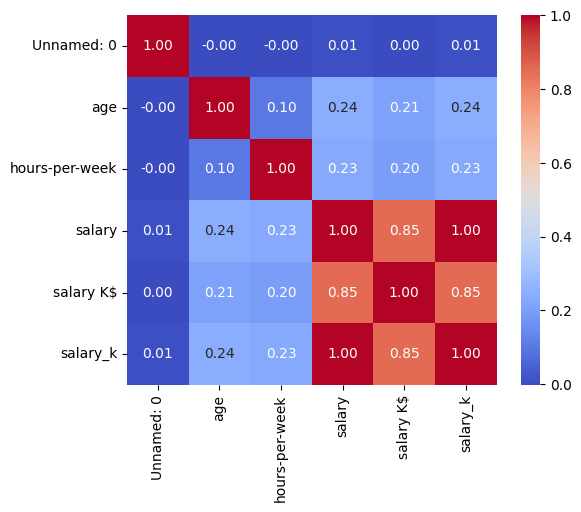

In [45]:
df['salary'] = df['salary'].apply(lambda x: 1 if x == '>50K' else 0)
df['salary_k'] = df['salary'].apply(lambda x: x*50 + 25)
corr_matrix = df.corr()
import seaborn as sns
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True)
print("Correlation coefficients between salary and other variables:")
print(corr_matrix['salary'].sort_values(ascending=False))